<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **LINEAR REGRESSION**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
car = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/ToyotaCorolla.csv')

## **Exploratory Data Analysis**

In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 1436 non-null   int64 
 1   Model              1436 non-null   object
 2   Price              1436 non-null   int64 
 3   Age_08_04          1436 non-null   int64 
 4   Mfg_Month          1436 non-null   int64 
 5   Mfg_Year           1436 non-null   int64 
 6   KM                 1436 non-null   int64 
 7   Fuel_Type          1436 non-null   object
 8   HP                 1436 non-null   int64 
 9   Met_Color          1436 non-null   int64 
 10  Color              1436 non-null   object
 11  Automatic          1436 non-null   int64 
 12  CC                 1436 non-null   int64 
 13  Doors              1436 non-null   int64 
 14  Cylinders          1436 non-null   int64 
 15  Gears              1436 non-null   int64 
 16  Quarterly_Tax      1436 non-null   int64 


In [4]:
car.isnull().sum()

Id                   0
Model                0
Price                0
Age_08_04            0
Mfg_Month            0
Mfg_Year             0
KM                   0
Fuel_Type            0
HP                   0
Met_Color            0
Color                0
Automatic            0
CC                   0
Doors                0
Cylinders            0
Gears                0
Quarterly_Tax        0
Weight               0
Mfr_Guarantee        0
BOVAG_Guarantee      0
Guarantee_Period     0
ABS                  0
Airbag_1             0
Airbag_2             0
Airco                0
Automatic_airco      0
Boardcomputer        0
CD_Player            0
Central_Lock         0
Powered_Windows      0
Power_Steering       0
Radio                0
Mistlamps            0
Sport_Model          0
Backseat_Divider     0
Metallic_Rim         0
Radio_cassette       0
Parking_Assistant    0
Tow_Bar              0
dtype: int64

In [5]:
car.describe()

Id         Price    Age_08_04    Mfg_Month     Mfg_Year  \
count  1436.000000   1436.000000  1436.000000  1436.000000  1436.000000   
mean    721.555014  10730.824513    55.947075     5.548747  1999.625348   
std     416.476890   3626.964585    18.599988     3.354085     1.540722   
min       1.000000   4350.000000     1.000000     1.000000  1998.000000   
25%     361.750000   8450.000000    44.000000     3.000000  1998.000000   
50%     721.500000   9900.000000    61.000000     5.000000  1999.000000   
75%    1081.250000  11950.000000    70.000000     8.000000  2001.000000   
max    1442.000000  32500.000000    80.000000    12.000000  2004.000000   

                  KM           HP    Met_Color    Automatic           CC  ...  \
count    1436.000000  1436.000000  1436.000000  1436.000000   1436.00000  ...   
mean    68533.259749   101.502089     0.674791     0.055710   1576.85585  ...   
std     37506.448872    14.981080     0.468616     0.229441    424.38677  ...   
min         1.000000    69.000000     0.000000     0.000000   1300.00000  ...   
25%     43000.000000    90.000000     0.000000     0.000000   1400.00000  ...   
50%     63389.500000   110.000000     1.000000     0.000000   1600.00000  ...   
75%     87020.750000   110.000000     1.000000     0.000000   1600.00000  ...   
max    243000.000000   192.000000     1.000000     1.000000  16000.00000  ...   

       Powered_Windows  Power_Steering        Radio    Mistlamps  Sport_Model  \
count      1436.000000     1436.000000  1436.000000  1436.000000  1436.000000   
mean          0.561978        0.977716     0.146240     0.256964     0.300139   
std           0.496317        0.147657     0.353469     0.437111     0.458478   
min           0.000000        0.000000     0.000000     0.000000     0.000000   
25%           0.000000        1.000000     0.000000     0.000000     0.000000   
50%           1.000000        1.000000     0.000000     0.000000     0.000000   
75%           1.000000        1.000000     0.000000     1.000000     1.000000   
max           1.000000        1.000000     1.000000     1.000000     1.000000   

       Backseat_Divider  Metallic_Rim  Radio_cassette  Parking_Assistant  \
count       1436.000000   1436.000000     1436.000000        1436.000000   
mean           0.770195      0.204735        0.145543           0.002786   
std            0.420854      0.403649        0.352770           0.052723   
min            0.000000      0.000000        0.000000           0.000000   
25%            1.000000      0.000000        0.000000           0.000000   
50%            1.000000      0.000000        0.000000           0.000000   
75%            1.000000      0.000000        0.000000           0.000000   
max            1.000000      1.000000        1.000000           1.000000   

           Tow_Bar  
count  1436.000000  
mean      0.277855  
std       0.448098  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  

[8 rows x 36 columns]

In [6]:
car.head(4)

Id                                          Model  Price  Age_08_04  \
0   1  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Powered_Windows  \
0         10      2002  46986    Diesel  90          1  ...               1   
1         10      2002  72937    Diesel  90          1  ...               0   
2          9      2002  41711    Diesel  90          1  ...               0   
3          7      2002  48000    Diesel  90          0  ...               0   

   Power_Steering  Radio  Mistlamps  Sport_Model  Backseat_Divider  \
0               1      0          0            0                 1   
1               1      0          0            0                 1   
2               1      0          0            0                 1   
3               1      0          0            0                 1   

   Metallic_Rim  Radio_cassette  Parking_Assistant  Tow_Bar  
0             0               0                  0        0  
1             0               0                  0        0  
2             0               0                  0        0  
3             0               0                  0        0  

[4 rows x 39 columns]

<ipython-input-7-223c5ac45908>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = car.corr().round(2)


<Axes: >

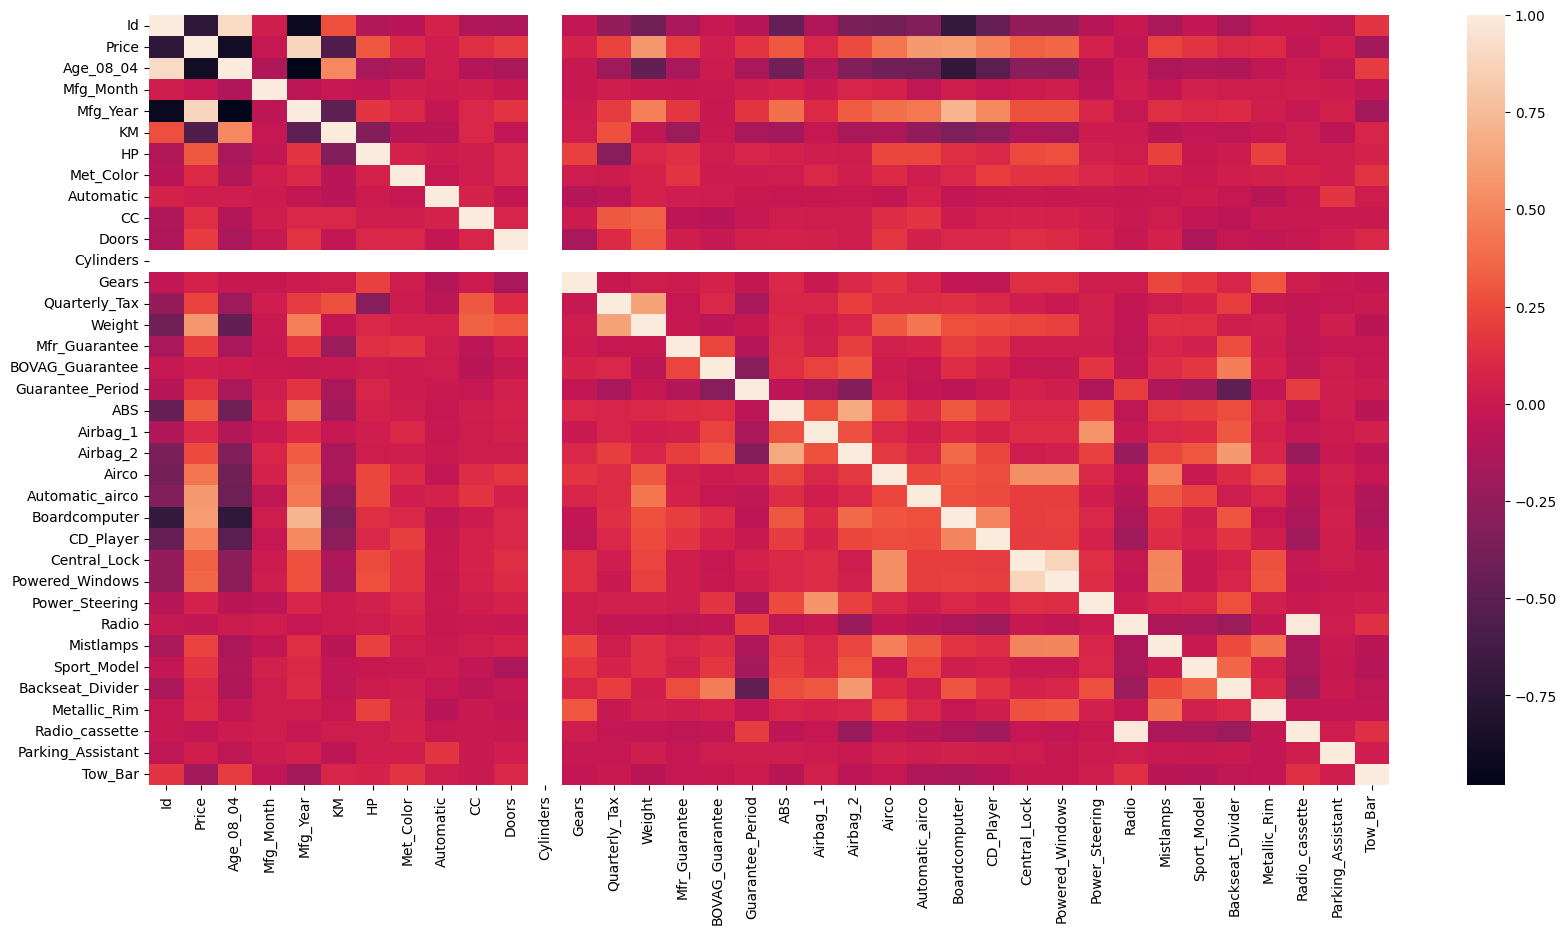

In [7]:
correlation_matrix = car.corr().round(2)
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(data=correlation_matrix,ax=ax)

In [8]:
car.corrwith(car['Price'])

<ipython-input-8-65cf3f4ec56e>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  car.corrwith(car['Price'])


Id                  -0.738250
Price                1.000000
Age_08_04           -0.876590
Mfg_Month           -0.018138
Mfg_Year             0.885159
KM                  -0.569960
HP                   0.314990
Met_Color            0.108905
Automatic            0.033081
CC                   0.126389
Doors                0.185326
Cylinders                 NaN
Gears                0.063104
Quarterly_Tax        0.219197
Weight               0.581198
Mfr_Guarantee        0.197802
BOVAG_Guarantee      0.028133
Guarantee_Period     0.146627
ABS                  0.306138
Airbag_1             0.093588
Airbag_2             0.248974
Airco                0.429259
Automatic_airco      0.588262
Boardcomputer        0.601292
CD_Player            0.481374
Central_Lock         0.343458
Powered_Windows      0.356518
Power_Steering       0.064275
Radio               -0.041887
Mistlamps            0.222083
Sport_Model          0.164121
Backseat_Divider     0.102569
Metallic_Rim         0.108564
Radio_cass

In [9]:
car['Cylinders'].value_counts()

4    1436
Name: Cylinders, dtype: int64

In [10]:
car['Model'].value_counts()

TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-Doors    109
TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-Doors     84
TOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-Doors       80
TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-Doors      71
TOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-Doors     54
                                                      ... 
TOYOTA Corolla 1.6 VVT-i L. Sol Wagon Stationwagen       1
TOYOTA Corolla 1.6 LB LINEA SOL 4/5-Doors                1
TOYOTA Corolla 1.4 VVT-i Linea Sol HB 2/3-Doors          1
TOYOTA Corolla 1.9 D Linea Terra 2/3-Doors               1
TOYOTA Corolla 1.3 Linea Terra 4/5-Doors                 1
Name: Model, Length: 319, dtype: int64

In [11]:
car['Fuel_Type'].value_counts()

Petrol    1264
Diesel     155
CNG         17
Name: Fuel_Type, dtype: int64

In [12]:
car['Color'].value_counts()

Grey      301
Blue      283
Red       278
Green     220
Black     191
Silver    122
White      31
Violet      4
Yellow      3
Beige       3
Name: Color, dtype: int64

In [13]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


y=car['Price']
X=car.drop(['Price','Cylinders','Id'],axis=1)

#We drop Cylinders since we have only 1 value


In [14]:
print(y.shape)
print(X.shape)

(1436,)
(1436, 36)


In [15]:
X.columns

Index(['Model', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM', 'Fuel_Type', 'HP',
       'Met_Color', 'Color', 'Automatic', 'CC', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Parking_Assistant', 'Tow_Bar'],
      dtype='object')

## **Train-Test Split Evaluation**

The train-test split is a technique for evaluating the performance of a machine learning algorithm.

It can be used for classification or regression problems and can be used for any supervised learning algorithm.

The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.

**Train Dataset:** Used to fit the machine learning model.

**Test Dataset**: Used to evaluate the fit machine learning model.

The objective is to estimate the performance of the machine learning model on new data: data not used to train the model.

This is how we expect to use the model in practice. Namely, to fit it on available data with known inputs and outputs, then make predictions on new examples in the future where we do not have the expected output or target values.

In [ ]:
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=5)
#The size of the split can be specified via the “test_size” argument that takes a number
# of rows (integer) or a percentage (float) of the size of the dataset between 0 and 1.
#Using random state with integer value, we get the same train and test size.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [17]:
car_lm = LinearRegression()
car_lm.fit(X_train, y_train)


LinearRegression()

In [18]:
cf=pd.DataFrame({'Predictor': X.columns, 'coefficient':car_lm.coef_})
cf

Predictor   coefficient
0       Age_08_04 -1.967141e+02
1       Mfg_Month -1.757076e+02
2        Mfg_Year -1.258501e+03
3              KM -1.642931e-02
4              HP  2.610084e+07
..            ...           ...
357     Color_Red  3.979669e+02
358  Color_Silver  3.862743e+02
359  Color_Violet  1.660820e+03
360   Color_White  3.810545e+01
361  Color_Yellow  5.729074e+02

[362 rows x 2 columns]

                                             Predictor   coefficient
0                                            Automatic -8.214776e+09
1    Model_TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs ... -2.766670e+09
2    Model_TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs ... -2.766669e+09
3    Model_TOYOTA Corolla 1.8 VVTL-i T-Sport 4/5-Doors -2.766669e+09
4    Model_TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors -2.766668e+09
..                                                 ...           ...
357  Model_TOYOTA Corolla 1.3 16V HATCHB LINEA TERR...  8.214775e+09
358  Model_TOYOTA Corolla 1.3 16V SEDAN LINEA TERRA...  8.214776e+09
359  Model_TOYOTA Corolla 1.3 Linea Terra Hatchback...  8.214776e+09
360  Model_TOYOTA Corolla 1.3 16V HATCHB LINEA LUNA...  8.214776e+09
361  Model_TOYOTA Corolla 1.3 16V LIFTB LINEA TERRA...  8.214777e+09

[362 rows x 2 columns]


<Axes: >

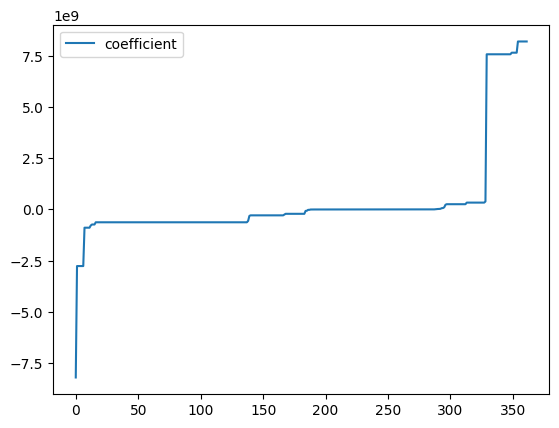

In [19]:
cf.sort_values(by=['coefficient'],ignore_index=True, inplace=True)
print(cf)
cf.plot()

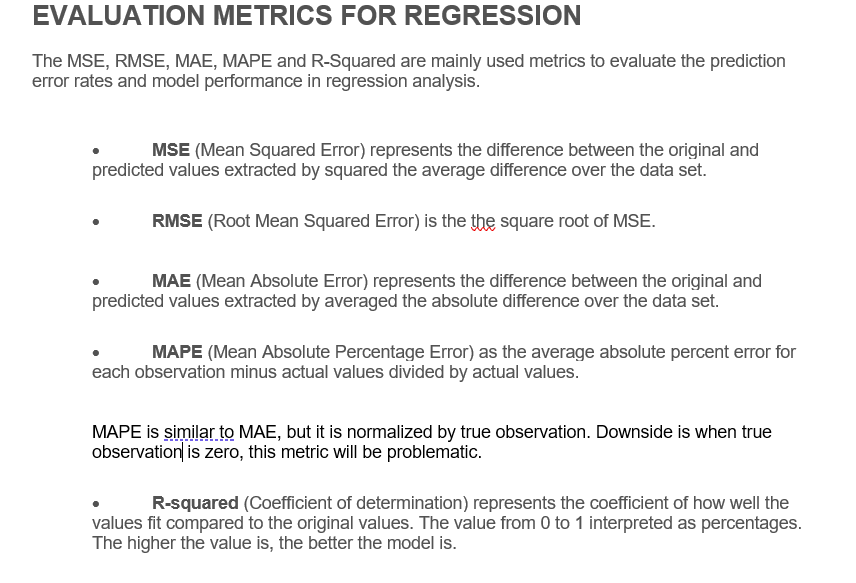

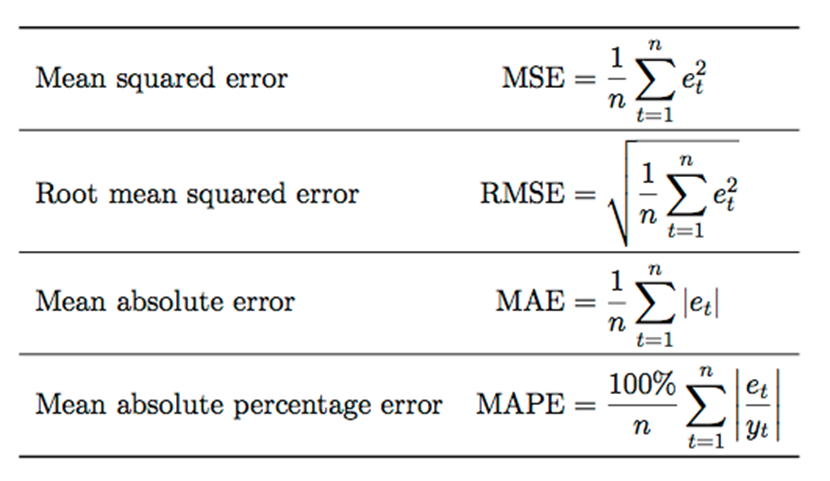

In [26]:
def evalmetric(y,ypred):
 import numpy as np
 e = y - ypred
 mse_f = np.mean(e**2)
 rmse_f = np.sqrt(mse_f)
 mae_f = np.mean(abs(e))
 mape_f = 100*np.mean(abs(e/y))
 squared_error = np.sum((y - ypred)**2)
 correlation_matrix = np.corrcoef(y, ypred)
 correlation_xy = correlation_matrix[0,1]
 r_squared = correlation_xy**2
 r2_f = 1-(sum(e**2)/sum((y-np.mean(y))**2))
 print("MSE:", mse_f)
 print("RMSE:", rmse_f)
 print("MAE:",mae_f)
 print("MAPE:",mape_f)
 print("R-Squared:", r2_f)
 print("R-Squared2:", r_squared)

In [27]:
#Performance of Training Data
predT=car_lm.predict(X_train)
evalmetric(y_train,predT)

MSE: 497176.43777454615
RMSE: 705.1073944971405
MAE: 506.88436557648487
MAPE: 5.180399398548026
R-Squared: 0.964348534648317
R-Squared2: 0.9643485347269523


In [28]:
#Performance of Test Data
pred=car_lm.predict(X_test)
evalmetric(y_test,pred)

MSE: 1.4629449788456018e+18
RMSE: 1209522624.3628523
MAE: 240546373.63736105
MAPE: 1862556.9391122158
R-Squared: -148361674293.24997
R-Squared2: 0.027190475589732543


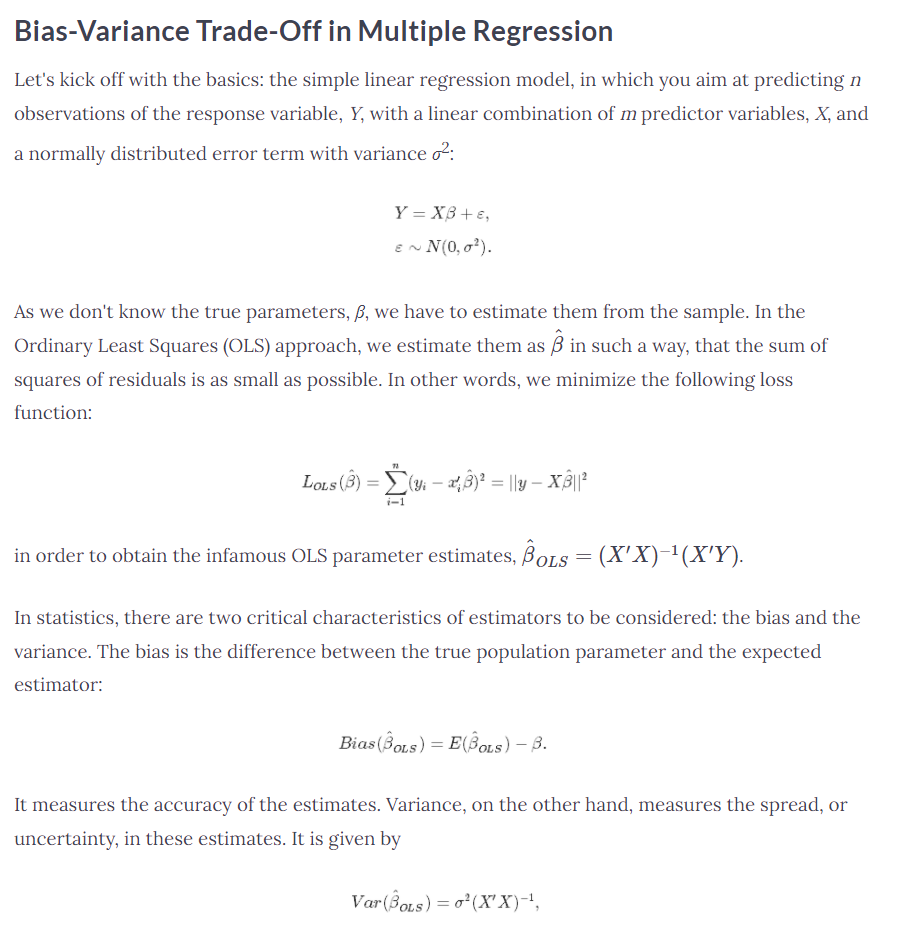

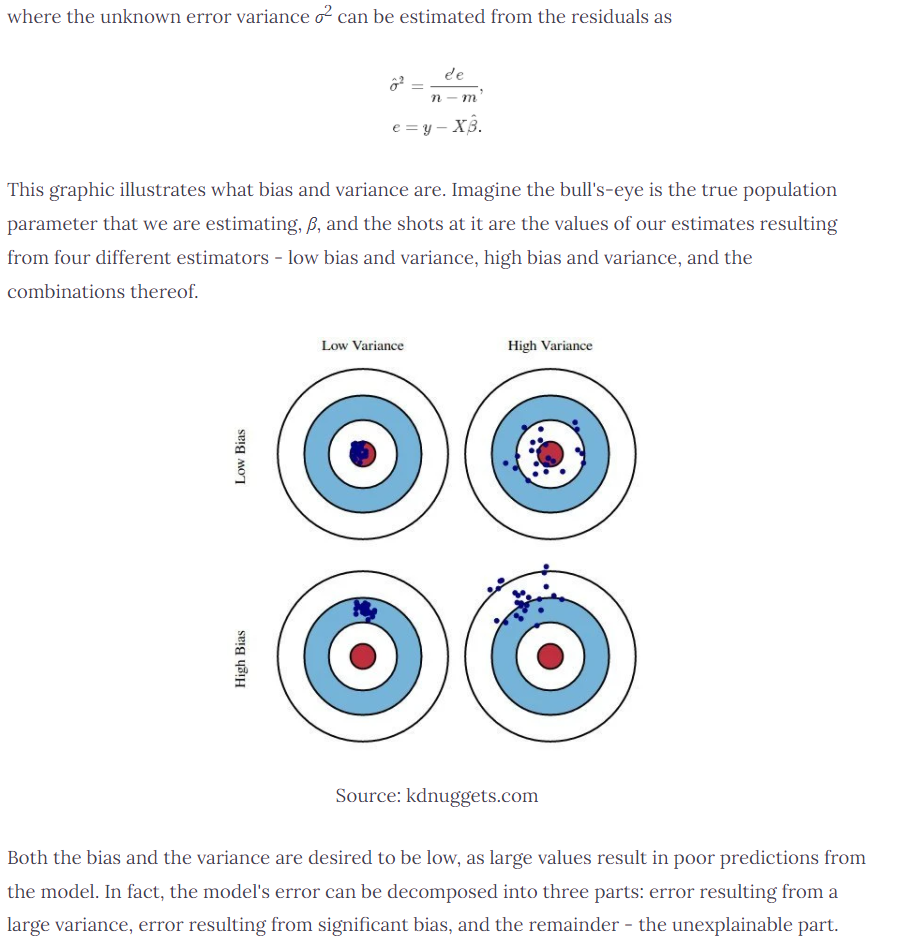

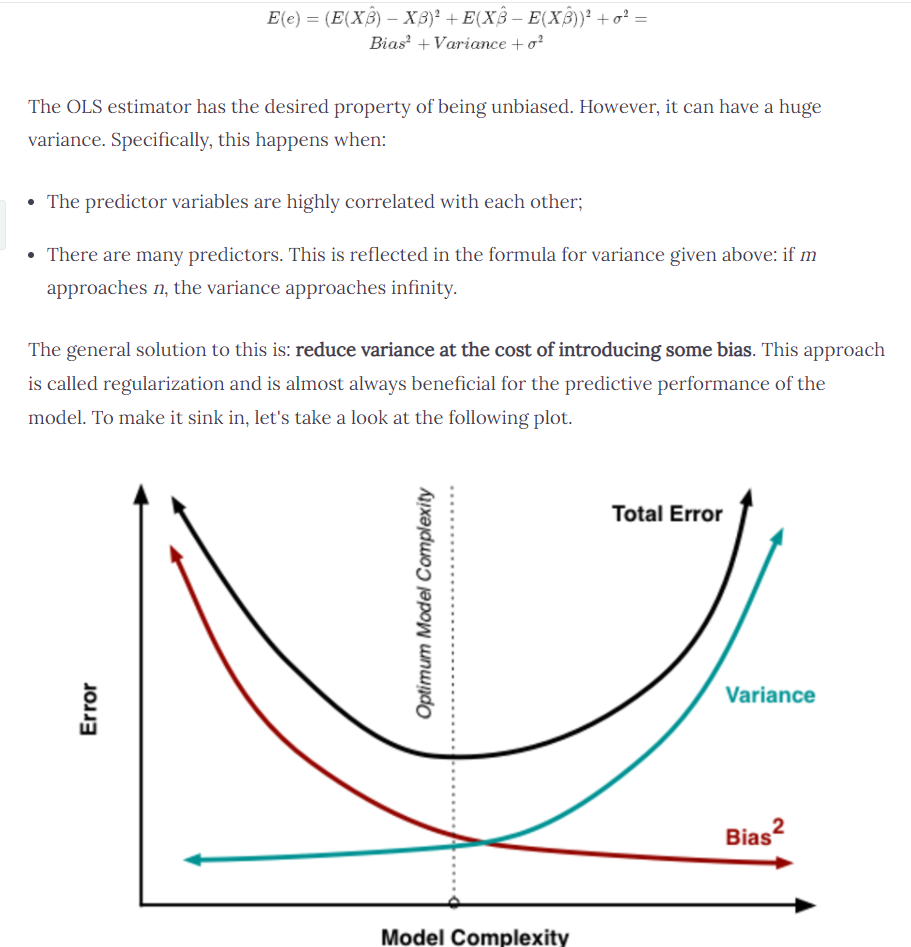

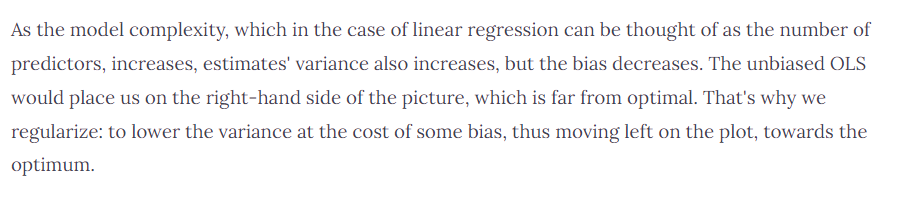

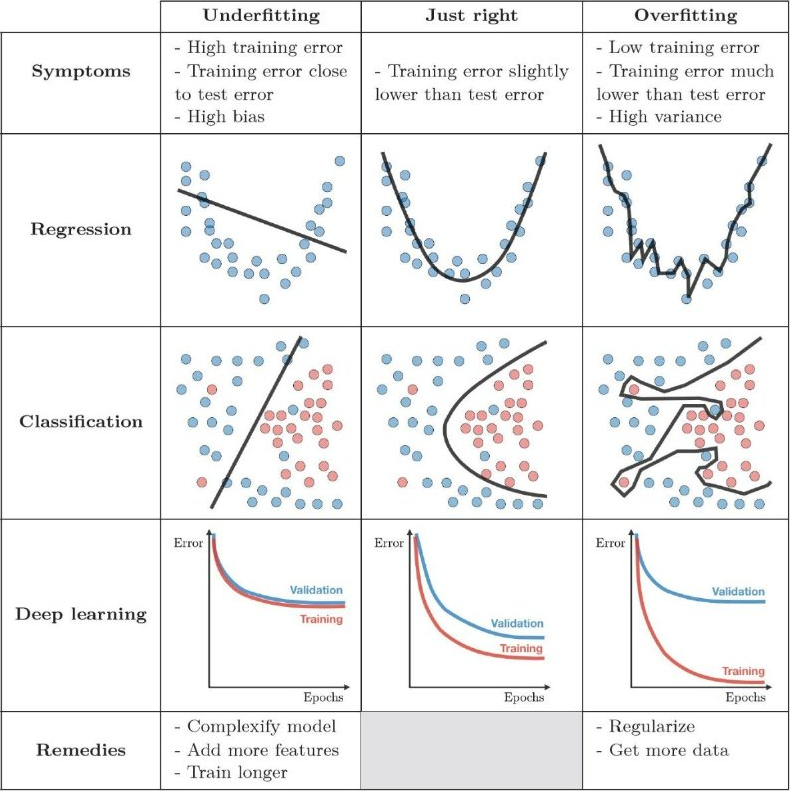

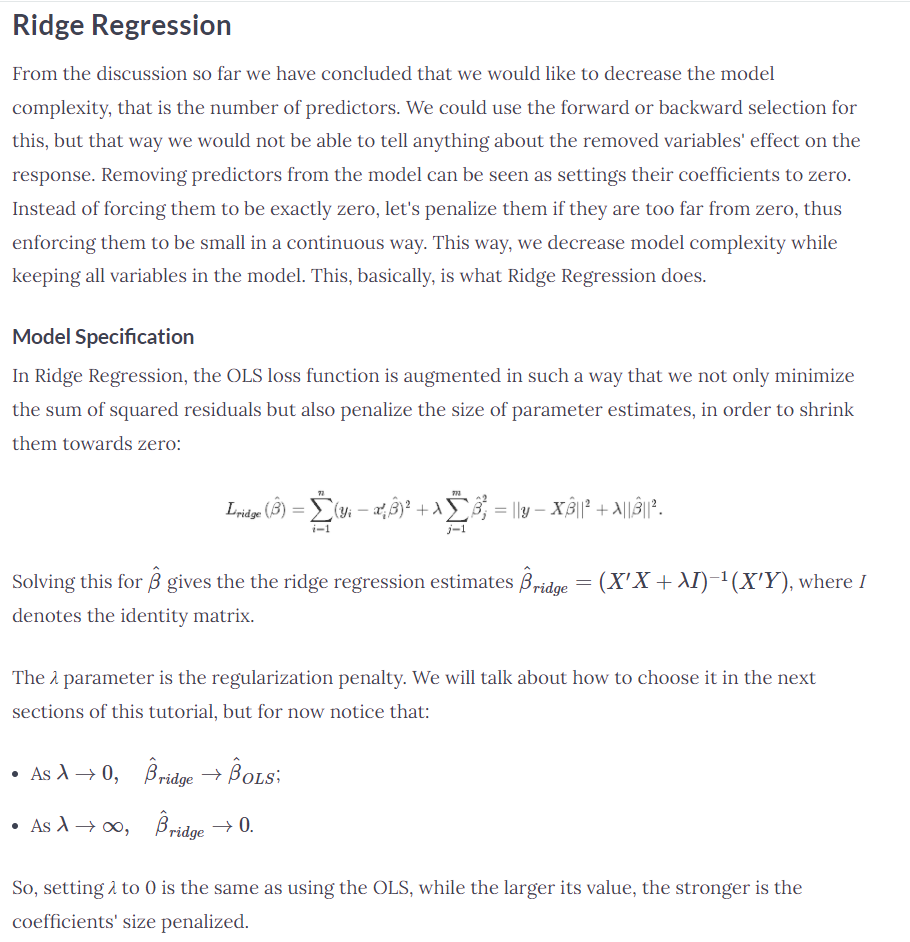

In [29]:
from sklearn.linear_model import Ridge, Lasso,ElasticNet, LassoCV,RidgeCV
ridge2 = Ridge()
ridge2.fit(X_train, y_train)             # Fit a ridge regression on the training data


Ridge()

In [30]:
# evaluation of training data
predR = ridge2.predict(X_train)
evalmetric(y_train,predR)

MSE: 644003.5878033303
RMSE: 802.498341308772
MAE: 621.3945879928657
MAPE: 6.268361208257926
R-Squared: 0.9538198718754619
R-Squared2: 0.9539330979357549


In [31]:
# evaluation of test data
predR = ridge2.predict(X_test)
evalmetric(y_test,predR)

MSE: 1037167.6979638417
RMSE: 1018.4143056555332
MAE: 767.7707281459657
MAPE: 7.927134633310182
R-Squared: 0.8948176873232438
R-Squared2: 0.8969151847757348


In [32]:
#compare the performance of test data with the linear model
pred=car_lm.predict(X_test)
evalmetric(y_test,pred)

MSE: 1.4629449788456018e+18
RMSE: 1209522624.3628523
MAE: 240546373.63736105
MAPE: 1862556.9391122158
R-Squared: -148361674293.24997
R-Squared2: 0.027190475589732543


                                             Predictor  coefficient
0      Model_TOYOTA Corolla 1.6 HB LINEA SOL 4/5-Doors -3712.299629
1                  Model_TOYOTA Corolla 1.8D 4/5-Doors -2467.015865
2               Model_TOYOTA Corolla 1.8D Stationwagen -2176.887263
3                  Model_TOYOTA Corolla 2.0D 4/5-Doors -1526.224645
4     Model_TOYOTA Corolla 2.0 D4D SEDAN SOL 4/5-Doors -1313.527920
..                                                 ...          ...
357  Model_TOYOTA Corolla 1.6 16V VVT I 5DR EXEC BN...  2158.052296
358  Model_TOYOTA Corolla Luna 5drs D4D116 PK 4/5-D...  2189.282646
359                                    Automatic_airco  2316.940885
360     Model_TOYOTA Corolla VERSO 2.0 D4D SOL (7) MPV  2620.697445
361  Model_TOYOTA Corolla VERSO 2.0 D4D SOL (7) BNS...  2715.965762

[362 rows x 2 columns]


<Axes: >

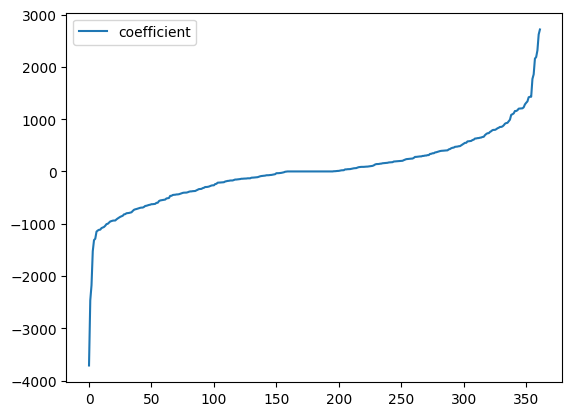

In [33]:
rd=pd.DataFrame({'Predictor': X.columns, 'coefficient':ridge2.coef_})
rd.sort_values(by=['coefficient'],ignore_index=True, inplace=True)
print(rd)
rd.plot()

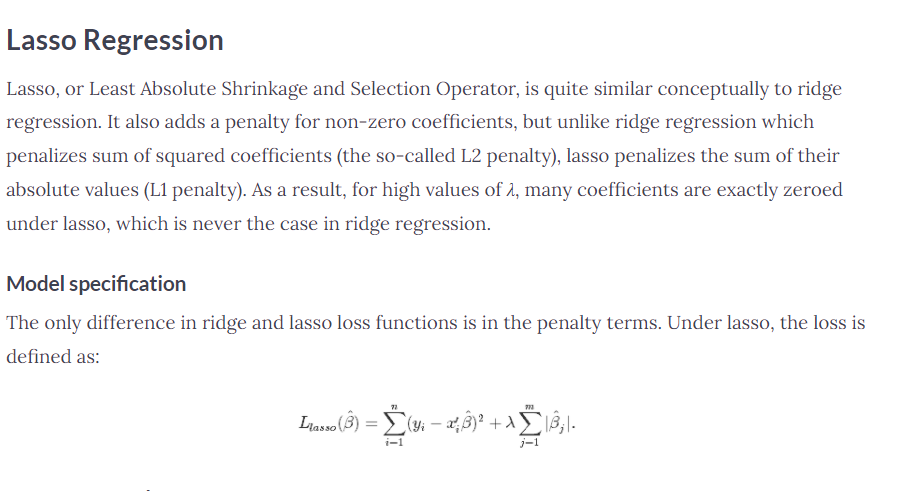

In [34]:
lasso2 = Lasso()
lasso2.fit(X_train, y_train)             # Fit a lasso regression on the training data


Lasso()

In [35]:
 # Use this model to evaluate the training data
predL = lasso2.predict(X_train)
evalmetric(y_train,predL)

MSE: 678833.4463744608
RMSE: 823.9134944728487
MAE: 658.1665381590241
MAPE: 6.634542784458154
R-Squared: 0.9513222967658873
R-Squared2: 0.9513930947080873


In [36]:
# Use this model to predict the test data
predL = lasso2.predict(X_test)
evalmetric(y_test,predL)

MSE: 997580.9842801744
RMSE: 998.7897597994156
MAE: 748.9403009674629
MAPE: 7.7544627395145795
R-Squared: 0.8988322956693148
R-Squared2: 0.8998767067401968


                                             Predictor  coefficient
0      Model_TOYOTA Corolla 1.6 HB LINEA SOL 4/5-Doors -7305.308623
1                  Model_TOYOTA Corolla 1.8D 4/5-Doors -3936.086574
2               Model_TOYOTA Corolla 1.8D Stationwagen -2901.633842
3                  Model_TOYOTA Corolla 2.0D 4/5-Doors -2053.767461
4     Model_TOYOTA Corolla 2.0 D4D SEDAN SOL 4/5-Doors -1430.299615
..                                                 ...          ...
357  Model_TOYOTA Corolla 1.6-16v VVT-i Executive B...  2876.756859
358  Model_TOYOTA Corolla Luna 5drs D4D116 PK 4/5-D...  3264.443561
359  Model_TOYOTA Corolla 1.6 16V VVT I 5DR EXEC BN...  3313.051542
360     Model_TOYOTA Corolla VERSO 2.0 D4D SOL (7) MPV  3369.796161
361  Model_TOYOTA Corolla VERSO 2.0 D4D SOL (7) BNS...  4315.719021

[362 rows x 2 columns]


<Axes: >

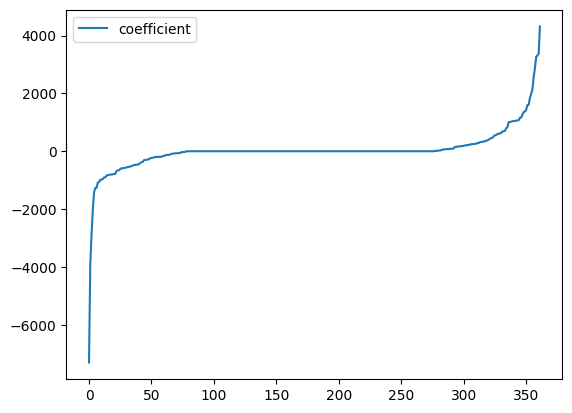

In [37]:
ls=pd.DataFrame({'Predictor': X.columns, 'coefficient':lasso2.coef_})
ls.sort_values(by=['coefficient'],ignore_index=True, inplace=True)
print(ls)
ls.plot()

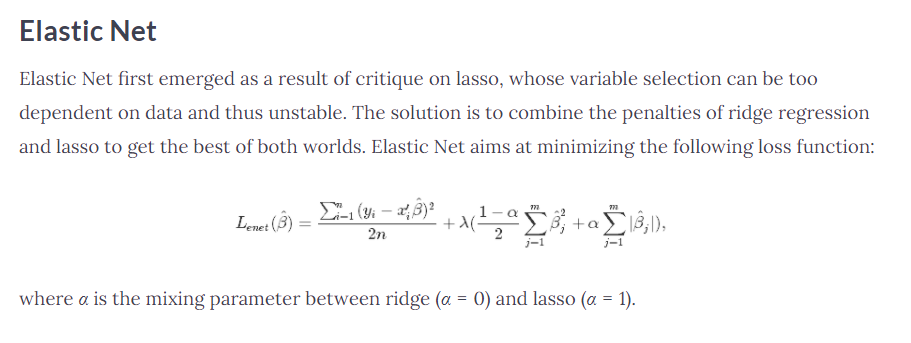

In [38]:
elas = ElasticNet()
elas.fit(X_train, y_train)             # Fit a lasso regression on the training data


ElasticNet()

In [39]:
# Use this model to evaluate in training data
predE = elas.predict(X_train)
evalmetric(y_train,predE)

MSE: 1500116.5447464064
RMSE: 1224.7924496609237
MAE: 903.241045294901
MAPE: 9.012204353383392
R-Squared: 0.8924298318361479
R-Squared2: 0.8924740494648835


In [40]:
 # Use this model to predict the test data
predE = elas.predict(X_test)
evalmetric(y_test,predE)

MSE: 1482342.8392321141
RMSE: 1217.515026285965
MAE: 907.6234366454039
MAPE: 9.21991171465088
R-Squared: 0.8496711300242419
R-Squared2: 0.8521023426774488


           Predictor  coefficient
0          Age_08_04  -120.836977
1          Mfg_Month   -94.990972
2        Color_Green   -67.046008
3            Tow_Bar   -60.423152
4      Boardcomputer   -52.508571
..               ...          ...
357    Mfr_Guarantee    82.865153
358        Mistlamps    92.381667
359  Powered_Windows   104.011546
360      Sport_Model   145.756138
361  Automatic_airco   168.499958

[362 rows x 2 columns]


<Axes: >

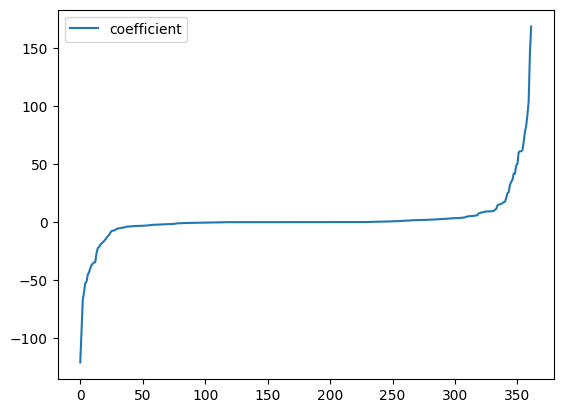

In [41]:
el=pd.DataFrame({'Predictor': X.columns, 'coefficient':elas.coef_})
el.sort_values(by=['coefficient'],ignore_index=True, inplace=True)
print(el)
el.plot()

## **SUMMARY**

If your linear model contains many predictor variables or if these variables are correlated, the standard OLS parameter estimates have large variance, thus making the model unreliable.

To counter this, you can use regularization - a technique allowing to decrease this variance at the cost of introducing some bias. Finding a good bias-variance trade-off allows to minimize the model's total error.

There are three popular regularization techniques, each of them aiming at decreasing the size of the coefficients:

Ridge Regression, which penalizes sum of squared coefficients (L2 penalty).

Lasso Regression, which penalizes the sum of absolute values of the coefficients (L1 penalty).

Elastic Net, a convex combination of Ridge and Lasso.

